<a href="https://colab.research.google.com/github/jarbairn/tf-regression-1/blob/main/Tensorflow_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling with tensorflow


Small example of using tensorflow to implement linear regression:

In [1]:
import tensorflow as tf
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

Estimating the gradient at x = 2, where y = x<sup>2</sup>



In [2]:
x = tf.Variable([[2.0]])
with tf.GradientTape() as tape:
    y = 2 * x * x

dy_dx = tape.gradient(y,x)
print(dy_dx)

tf.Tensor([[8.]], shape=(1, 1), dtype=float32)


Let us consider z = x<sup>2</sup> + y<sup>2</sup>

In [3]:
def eval_multivariate_func(x1, x2):
    return x1 ** 2.0 + x2 ** 2

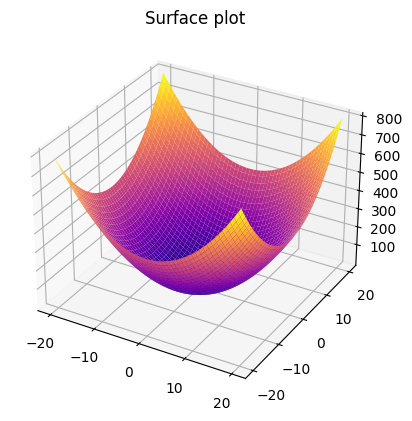

In [4]:
x1 = np.outer(np.linspace(-20,20,200), np.ones(200))
x2 = x1.copy().T
f = eval_multivariate_func(x1,x2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x1,x2,f,cmap='plasma',edgecolor='none')
ax.set_title('Surface plot')
plt.show()

In [5]:
x1 = tf.Variable(-10.0)
x2 = tf.Variable(10.0)

for i in range(50):
    with tf.GradientTape() as tape:
        y = eval_multivariate_func(x1,x2)
    grads = tape.gradient(y,[x1,x2])
    print('y = {:.1f}, x1 = {:.1f}, x2 = {:.1f}, grads0 = {:.1f}, grads1 = {:.1f} '.format(
        y.numpy(),
        x1.numpy(),
        x2.numpy(),
        grads[0].numpy(),
        grads[1].numpy()))
    x1.assign(x1 - 0.1*grads[0].numpy())
    x2.assign(x2 - 0.1*grads[1].numpy())

y = 200.0, x1 = -10.0, x2 = 10.0, grads0 = -20.0, grads1 = 20.0 
y = 128.0, x1 = -8.0, x2 = 8.0, grads0 = -16.0, grads1 = 16.0 
y = 81.9, x1 = -6.4, x2 = 6.4, grads0 = -12.8, grads1 = 12.8 
y = 52.4, x1 = -5.1, x2 = 5.1, grads0 = -10.2, grads1 = 10.2 
y = 33.6, x1 = -4.1, x2 = 4.1, grads0 = -8.2, grads1 = 8.2 
y = 21.5, x1 = -3.3, x2 = 3.3, grads0 = -6.6, grads1 = 6.6 
y = 13.7, x1 = -2.6, x2 = 2.6, grads0 = -5.2, grads1 = 5.2 
y = 8.8, x1 = -2.1, x2 = 2.1, grads0 = -4.2, grads1 = 4.2 
y = 5.6, x1 = -1.7, x2 = 1.7, grads0 = -3.4, grads1 = 3.4 
y = 3.6, x1 = -1.3, x2 = 1.3, grads0 = -2.7, grads1 = 2.7 
y = 2.3, x1 = -1.1, x2 = 1.1, grads0 = -2.1, grads1 = 2.1 
y = 1.5, x1 = -0.9, x2 = 0.9, grads0 = -1.7, grads1 = 1.7 
y = 0.9, x1 = -0.7, x2 = 0.7, grads0 = -1.4, grads1 = 1.4 
y = 0.6, x1 = -0.5, x2 = 0.5, grads0 = -1.1, grads1 = 1.1 
y = 0.4, x1 = -0.4, x2 = 0.4, grads0 = -0.9, grads1 = 0.9 
y = 0.2, x1 = -0.4, x2 = 0.4, grads0 = -0.7, grads1 = 0.7 
y = 0.2, x1 = -0.3, x2 = 0.3, grads0 

With step size $\alpha$ we can find the local minimum of this function.

## Linear regression

Let's define a linear model $(y = ax + b)$

In [7]:
class LinearModel:
    def __init__(self):
        self.a = tf.Variable(16.0) #default value of a = 16
        self.b = tf.Variable(10.0) #default value of b = 10

    def __call__(self,x):
        return self.a * x + self.b #linear y=mx+c style

Now we will synthetically generate some weight-height data, where $(a = 2.0)$ and $(b = 70)$

In [8]:
TRUE_a = 2.0 #gradient
TRUE_b = 70.0 #intercept

NUM_EXAMPLES = 1000

X = tf.random.normal(shape=(NUM_EXAMPLES,))
noise = tf.random.normal(shape=(NUM_EXAMPLES,))

y = X * TRUE_a + TRUE_b + noise

Now we will define the loss function using least squares expression:

In [9]:
def loss(y,y_pred):
    return tf.reduce_mean(tf.square(y-y_pred))

We then define training by gradient descent:

In [10]:
def train(model, X, y, lr=0.1):
    with tf.GradientTape() as t:
        current_loss = loss(y,model(X))
    da, db = t.gradient(current_loss, [model.a, model.b])
    model.a.assign_sub(lr*da)
    model.b.assign_sub(lr*db)

Overall:

In [11]:
model = LinearModel()
aStore, bStore = [],[]
trainingIterations = 50

for epoch in range(trainingIterations):
    aStore.append(model.a.numpy())
    bStore.append(model.b.numpy())
    current_loss = loss(y,model(X))
    train(model, X, y, lr = 0.1)
    print(f'Epoch {epoch}: Loss: {current_loss.numpy()}, W: {model.a.numpy()}, b: {model.b.numpy()}')

Epoch 0: Loss: 3720.001953125, W: 13.687746047973633, b: 21.86600685119629
Epoch 1: Loss: 2402.304443359375, W: 11.739703178405762, b: 31.379444122314453
Epoch 2: Loss: 1552.0101318359375, W: 10.102818489074707, b: 39.00757598876953
Epoch 3: Loss: 1003.130126953125, W: 8.730653762817383, b: 45.12468719482422
Epoch 4: Loss: 648.6953125, W: 7.582873821258545, b: 50.03062057495117
Epoch 5: Loss: 419.74444580078125, W: 6.624667167663574, b: 53.965606689453125
Epoch 6: Loss: 271.8026123046875, W: 5.8261566162109375, b: 57.12214660644531
Epoch 7: Loss: 176.17596435546875, W: 5.161820888519287, b: 59.654502868652344
Epoch 8: Loss: 114.3456039428711, W: 4.609951496124268, b: 61.686317443847656
Epoch 9: Loss: 74.35511016845703, W: 4.152149677276611, b: 63.31669235229492
Epoch 10: Loss: 48.48263168334961, W: 3.7728731632232666, b: 64.62507629394531
Epoch 11: Loss: 31.739240646362305, W: 3.4590303897857666, b: 65.6751708984375
Epoch 12: Loss: 20.900718688964844, W: 3.1996233463287354, b: 66.51804

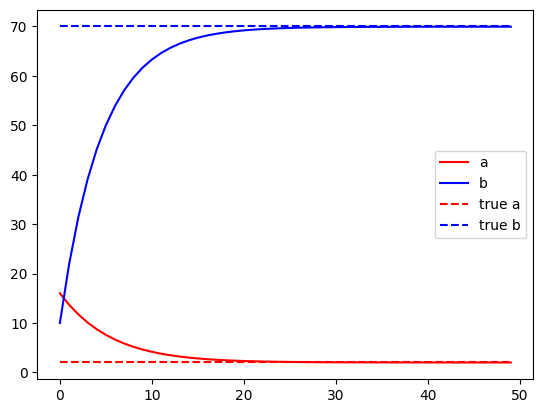

In [12]:
plt.plot(range(trainingIterations),aStore,'r', range(trainingIterations),bStore, 'b')
plt.plot([TRUE_a]*trainingIterations,'r--',[TRUE_b]*trainingIterations,'b--')
plt.legend(['a','b','true a','true b'])
plt.show()

## Regression take 2


We will define a new linear model to use keras:

In [13]:
layer0 = tf.keras.layers.Dense(units=1,input_shape=[1])
tfmodel = tf.keras.Sequential([layer0])
tfmodel.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

In [14]:
history = tfmodel.fit(X,y,epochs=100,verbose=False)

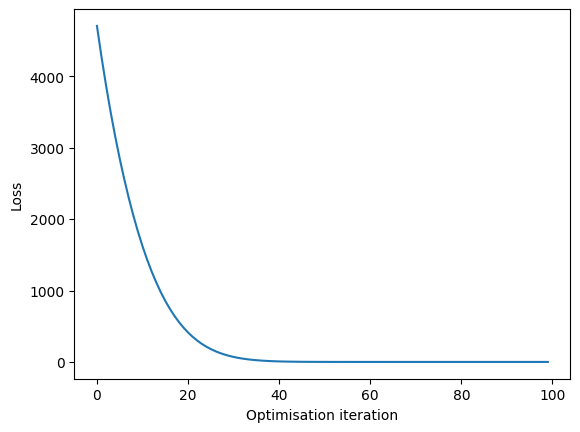

In [15]:
plt.xlabel('Optimisation iteration')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.show()

theta0: [69.95527] theta1: [1.9947472]


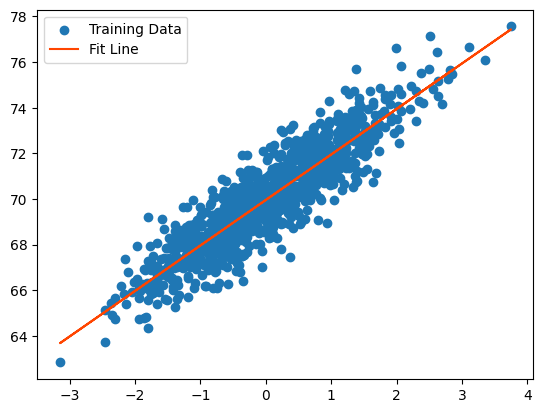

In [16]:
weights = layer0.get_weights()
theta1 = weights[0][0]
theta0 = weights[1]
print('theta0: {} theta1: {}'.format(theta0, theta1))
y_learned = X * theta1 + theta0

plt.scatter(X,y,label='Training Data')
plt.plot(X,y_learned,color='orangered',label='Fit Line')
plt.legend()
plt.show()